Veri Seti Linki: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess

In [3]:
import opendatasets as od
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import emot as e
import tensorflow as tf
from matplotlib.pyplot import specgram
import glob 
import IPython.display as ipd 
import sys
import pickle
import warnings
warnings.filterwarnings('ignore')
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

# Loading dataset

In [4]:
paths = [] 
labels = []
for dirname, _, filenames in os.walk(r'C:\Users\irems\Audio Emotions Classification\toronto-emotional-speech-set-tess\TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename)) 
        label = filename.split('_')[-1] 
        label = label.split('.')[0] 
        labels.append(label.lower()) 
    if len(paths) == 2800: 
        break
print('Dataset is Loaded')

Dataset is Loaded


In [5]:
len(paths)

2800

In [6]:
len(labels)

2800

In [7]:
sounds = [] 
for dirname, _, filenames in os.walk(r'C:\Users\irems\Audio Emotions Classification\toronto-emotional-speech-set-tess\TESS Toronto emotional speech set data'):
    for filename in filenames:
        sounds.append(os.path.join(dirname, filename))
        print(filename)
    if len(sounds) == 2800:
        break

OAF_back_angry.wav
OAF_bar_angry.wav
OAF_base_angry.wav
OAF_bath_angry.wav
OAF_bean_angry.wav
OAF_beg_angry.wav
OAF_bite_angry.wav
OAF_boat_angry.wav
OAF_bone_angry.wav
OAF_book_angry.wav
OAF_bought_angry.wav
OAF_burn_angry.wav
OAF_cab_angry.wav
OAF_calm_angry.wav
OAF_came_angry.wav
OAF_cause_angry.wav
OAF_chain_angry.wav
OAF_chair_angry.wav
OAF_chalk_angry.wav
OAF_chat_angry.wav
OAF_check_angry.wav
OAF_cheek_angry.wav
OAF_chief_angry.wav
OAF_choice_angry.wav
OAF_cool_angry.wav
OAF_dab_angry.wav
OAF_date_angry.wav
OAF_dead_angry.wav
OAF_death_angry.wav
OAF_deep_angry.wav
OAF_dime_angry.wav
OAF_dip_angry.wav
OAF_ditch_angry.wav
OAF_dodge_angry.wav
OAF_dog_angry.wav
OAF_doll_angry.wav
OAF_door_angry.wav
OAF_fail_angry.wav
OAF_fall_angry.wav
OAF_far_angry.wav
OAF_fat_angry.wav
OAF_fit_angry.wav
OAF_five_angry.wav
OAF_food_angry.wav
OAF_gap_angry.wav
OAF_gas_angry.wav
OAF_gaze_angry.wav
OAF_germ_angry.wav
OAF_get_angry.wav
OAF_gin_angry.wav
OAF_goal_angry.wav
OAF_good_angry.wav
OAF_goose_a

# Dataframe 

In [8]:
data = {'speech':paths,'label':labels}
df2 = pd.DataFrame(data)
print(df2)
df2.head()

                                                 speech  label
0     C:\Users\irems\Audio Emotions Classification\t...  angry
1     C:\Users\irems\Audio Emotions Classification\t...  angry
2     C:\Users\irems\Audio Emotions Classification\t...  angry
3     C:\Users\irems\Audio Emotions Classification\t...  angry
4     C:\Users\irems\Audio Emotions Classification\t...  angry
...                                                 ...    ...
2795  C:\Users\irems\Audio Emotions Classification\t...    sad
2796  C:\Users\irems\Audio Emotions Classification\t...    sad
2797  C:\Users\irems\Audio Emotions Classification\t...    sad
2798  C:\Users\irems\Audio Emotions Classification\t...    sad
2799  C:\Users\irems\Audio Emotions Classification\t...    sad

[2800 rows x 2 columns]


,speech,label
0,C:\Users\irems\Audio Emotions Classification\t...,angry
1,C:\Users\irems\Audio Emotions Classification\t...,angry
2,C:\Users\irems\Audio Emotions Classification\t...,angry
3,C:\Users\irems\Audio Emotions Classification\t...,angry
4,C:\Users\irems\Audio Emotions Classification\t...,angry


In [9]:
df2['label'].value_counts() 

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

# Veri Analizi

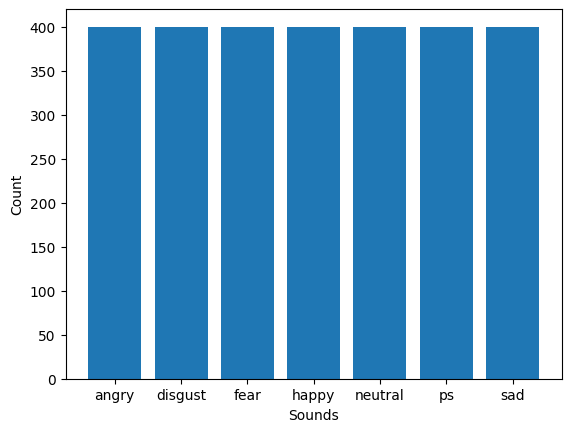

In [10]:
plt.bar(labels,height = 400)
plt.xlabel("Sounds")
plt.ylabel("Count")
plt.show()

In [11]:

def waveshow(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

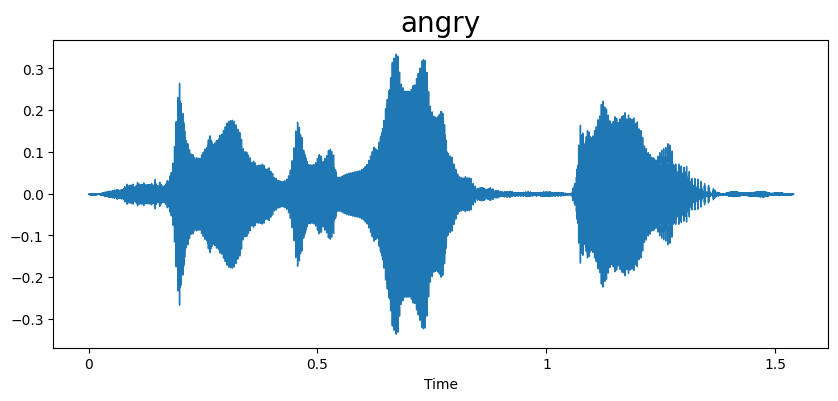

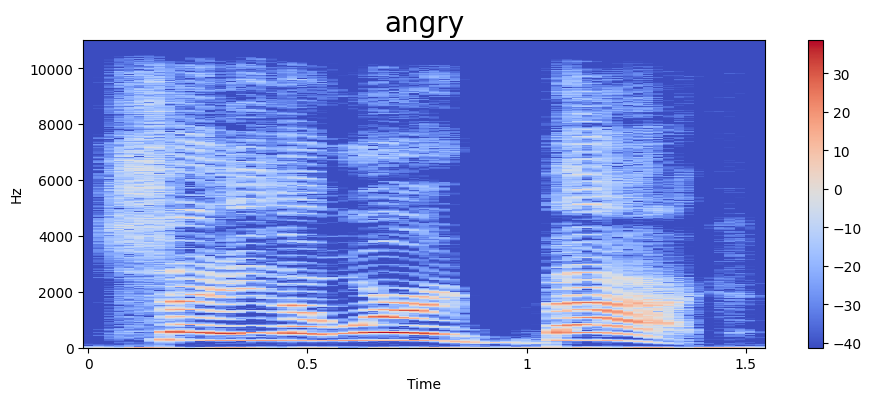

In [12]:
emotion = 'angry'
path = np.array(df2['speech'][df2['label']==emotion])[0] 
data, sampling_rate = librosa.load(path) 
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

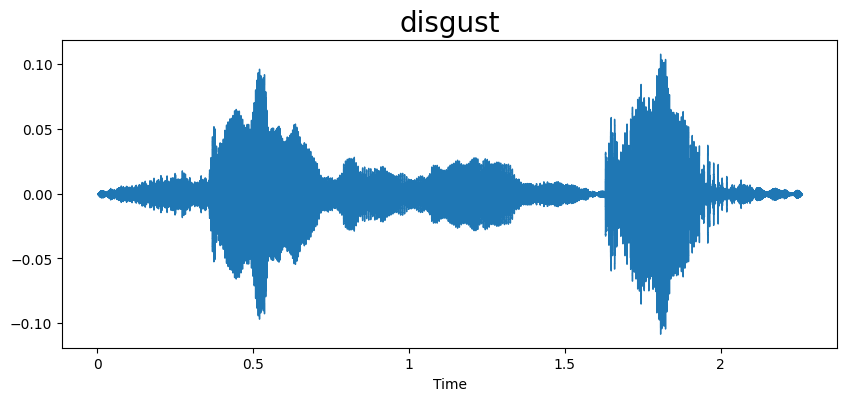

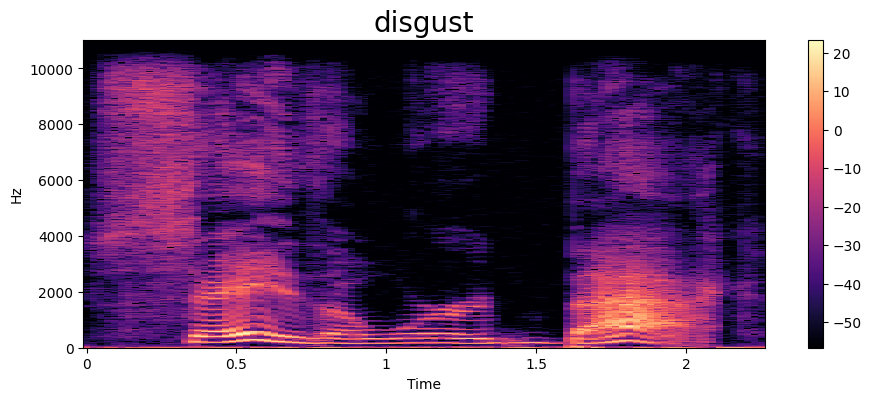

In [13]:
emotion = 'disgust'
path = np.array(df2['speech'][df2['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

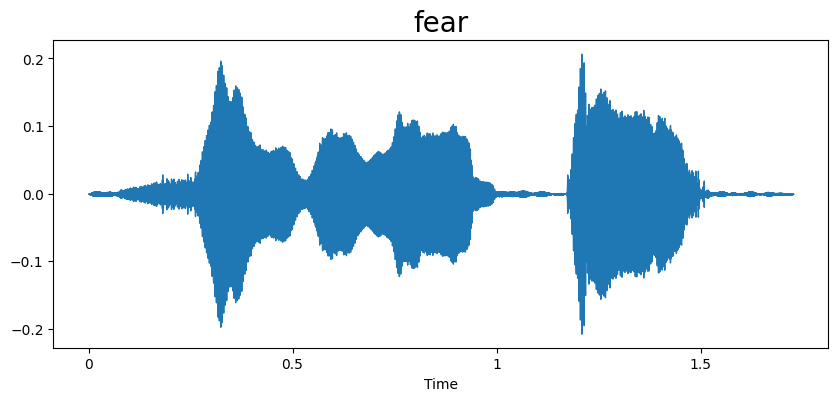

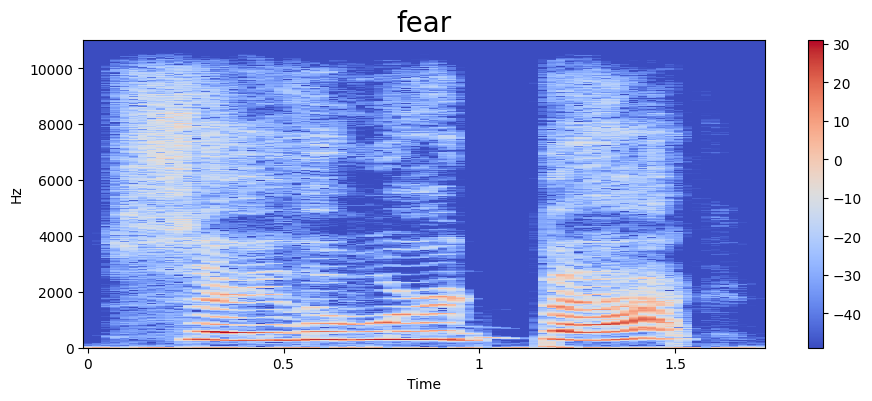

In [14]:
emotion = 'fear'
path = np.array(df2['speech'][df2['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

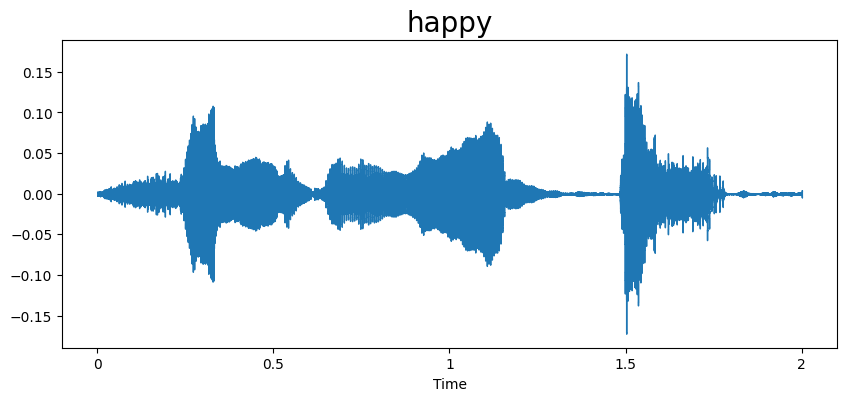

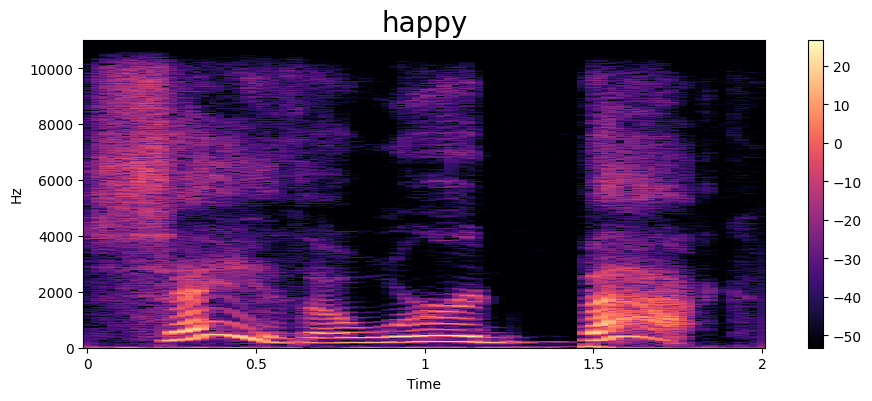

In [15]:
emotion = 'happy'
path = np.array(df2['speech'][df2['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

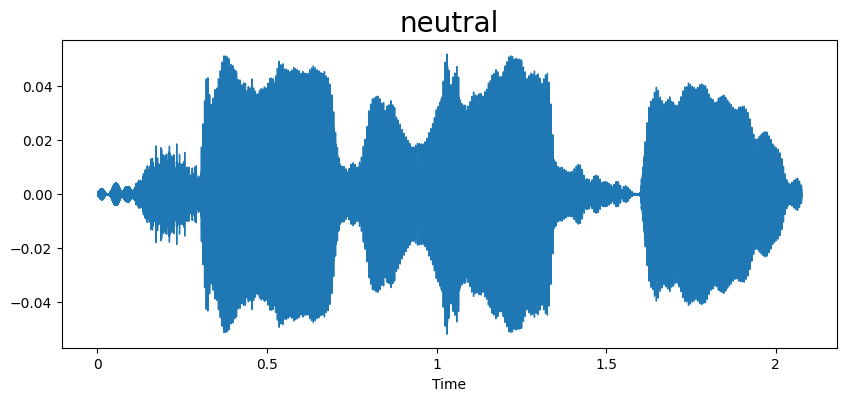

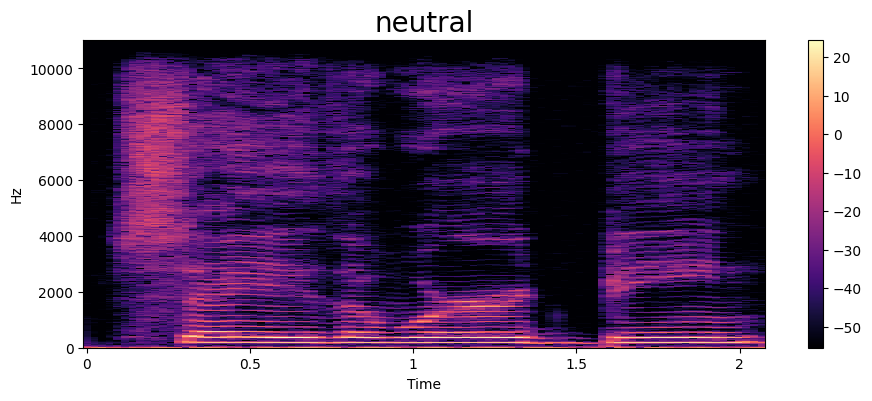

In [16]:
emotion = 'neutral'
path = np.array(df2['speech'][df2['label']==emotion])[4]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

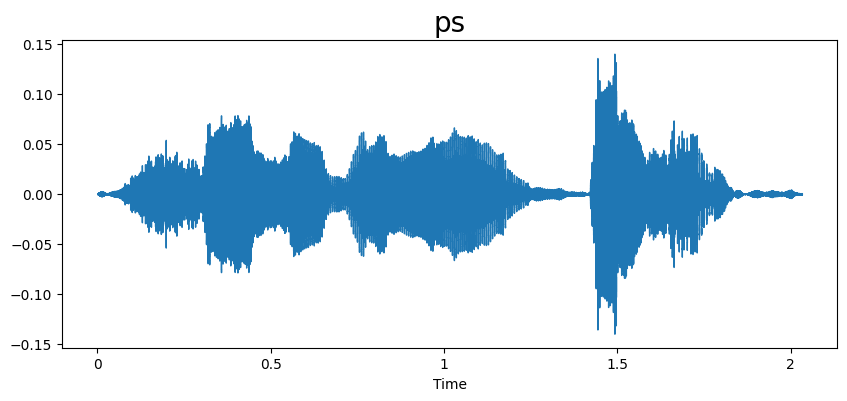

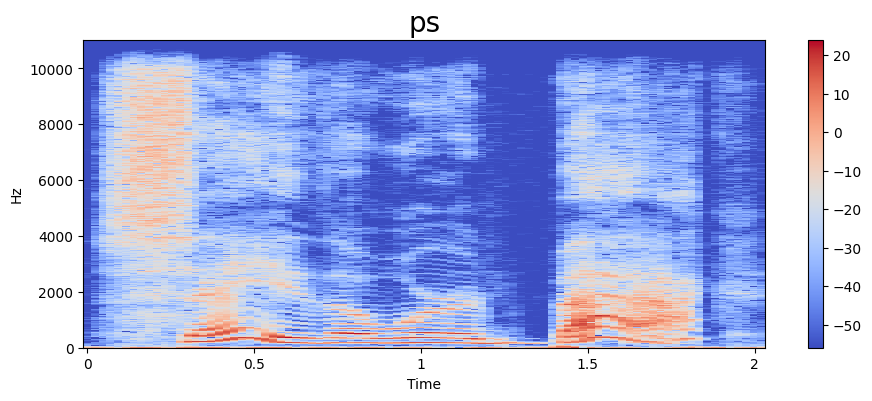

In [17]:
emotion = 'ps'
path = np.array(df2['speech'][df2['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

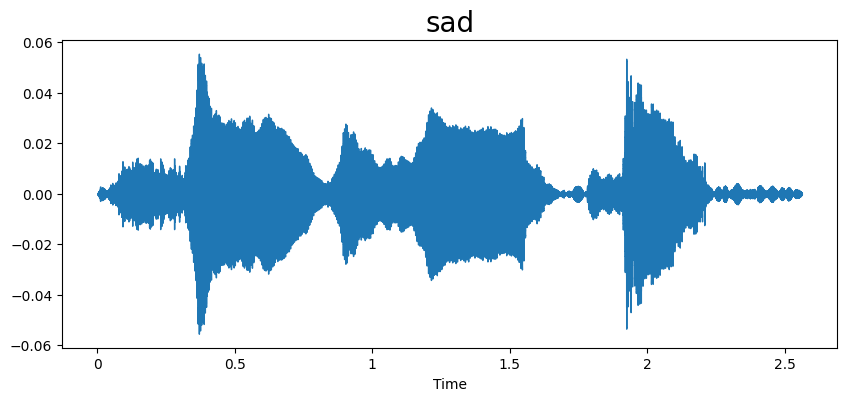

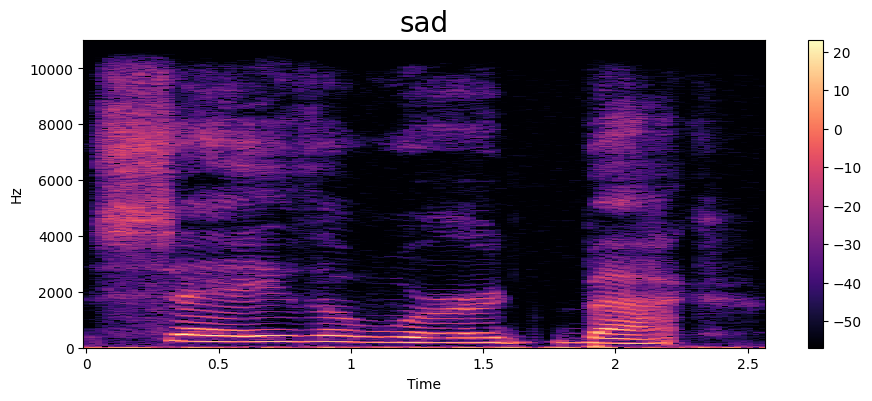

In [18]:
emotion = 'sad'
path = np.array(df2['speech'][df2['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Feature Extraction

In [19]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [20]:
extract_mfcc(df2['speech'][0])

array([-3.9791476e+02,  7.8756226e+01, -2.0911753e+01, -2.0349020e+01,
       -3.4199812e+00,  1.1357657e+01, -2.1622475e+01, -4.8617826e+00,
       -8.4185266e+00,  6.2100208e-01, -2.9795790e+00,  1.3149230e+00,
       -3.4300953e-01,  2.3402820e+00,  1.9168801e+00,  3.7745941e+00,
       -5.5863881e+00, -3.6113353e+00, -2.3929300e+00, -9.5256548e+00,
       -8.2061357e+00, -1.2038866e+00, -7.5688176e+00,  9.9129763e+00,
        7.9321527e+00,  2.2083347e+01,  1.8905153e+01,  2.0599804e+01,
        1.3219537e+01,  8.4827595e+00,  3.0294439e-01,  5.1541729e+00,
        9.5726032e+00,  5.4089766e+00,  2.6034529e+00, -1.9647242e+00,
        5.0509210e+00,  9.0977497e+00,  2.3394349e+00, -2.1917243e+00],
      dtype=float32)

In [21]:
X_mfcc = df2['speech'].apply(lambda x: extract_mfcc(x))

In [22]:
X_mfcc

0       [-397.91476, 78.756226, -20.911753, -20.34902,...
1       [-466.53455, 99.911064, -0.48027268, -31.61629...
2       [-431.5178, 48.56504, -0.8924488, 2.2234004, 0...
3       [-405.01205, 78.51893, -14.72178, -20.10229, -...
4       [-435.3804, 79.39025, 8.873595, 18.061928, 6.0...
                              ...                        
2795    [-554.5794, 91.78299, 25.282017, 18.345247, 17...
2796    [-590.1003, 97.41461, 35.74892, 16.209633, 27....
2797    [-535.2709, 88.06032, 25.163685, 21.924896, 19...
2798    [-549.7413, 111.764175, 30.308115, 14.165436, ...
2799    [-550.9464, 104.709015, 29.937454, 28.579796, ...
Name: speech, Length: 2800, dtype: object

In [23]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [24]:

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df2[['label']])

In [25]:
y = y.toarray()

In [26]:
y.shape 

(2800, 7)

In [27]:
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,train_size=0.75,random_state=9)

In [28]:

X_train = np.expand_dims(x_train, -1)
X_train.shape


(2100, 40, 1)

# LSTM Model

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(256, return_sequences=False, input_shape=(40,1))),
model.add(Dropout(0.2)),
model.add(Dense(128, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(64, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(7, activation='softmax')) 

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [31]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
27/27 [==============================] - 3s 68ms/step - loss: 1.2463 - accuracy: 0.5125 - val_loss: 0.6027 - val_accuracy: 0.7452
Epoch 2/50
27/27 [==============================] - 2s 56ms/step - loss: 0.4966 - accuracy: 0.8196 - val_loss: 0.3408 - val_accuracy: 0.9000
Epoch 3/50
27/27 [==============================] - 2s 56ms/step - loss: 0.2646 - accuracy: 0.9220 - val_loss: 0.1374 - val_accuracy: 0.9619
Epoch 4/50
27/27 [==============================] - 2s 57ms/step - loss: 0.3551 - accuracy: 0.8935 - val_loss: 0.1119 - val_accuracy: 0.9762
Epoch 5/50
27/27 [==============================] - 1s 55ms/step - loss: 0.1430 - accuracy: 0.9554 - val_loss: 0.1015 - val_accuracy: 0.9690
Epoch 6/50
27/27 [==============================] - 2s 58ms/step - loss: 0.1098 - accuracy: 0.9667 - val_loss: 0.0928 - val_accuracy: 0.9786
Epoch 7/50
27/27 [==============================] - 2s 59ms/step - loss: 0.1210 - accuracy: 0.9601 - val_loss: 0.0709 - val_accuracy: 0.9810
Epoch 8/50
27

In [32]:
prediction = model.predict(x_test)

22/22 [==============================] - 1s 17ms/step


In [33]:
print(prediction)

[[6.52985932e-09 8.74275656e-08 2.63682631e-10 ... 1.68395886e-07
  9.99999523e-01 9.49355350e-09]
 [6.31377794e-09 1.84663259e-06 8.07857248e-09 ... 5.10427434e-09
  2.20484466e-07 9.99997854e-01]
 [2.93393221e-09 9.99981761e-01 1.28658431e-10 ... 4.38614567e-09
  1.93418899e-07 1.70319054e-05]
 ...
 [2.21305752e-09 6.44479528e-08 2.43390724e-10 ... 7.64498012e-08
  9.99999404e-01 1.66665330e-08]
 [1.14030535e-10 9.99999285e-01 1.50565237e-12 ... 1.22494515e-10
  5.10483655e-09 6.10501274e-07]
 [9.99999762e-01 3.92380954e-08 1.88836012e-07 ... 3.33116148e-08
  1.15154570e-08 1.42547152e-09]]


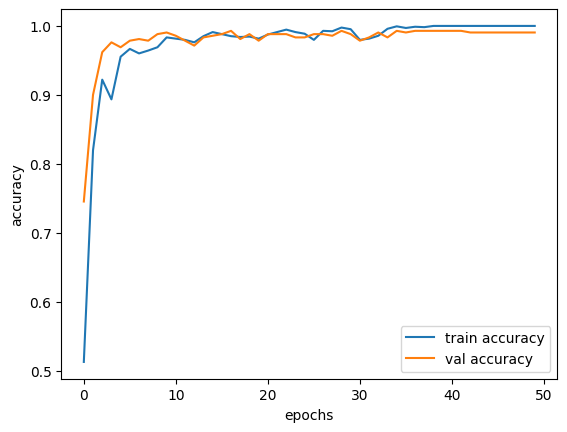

In [34]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

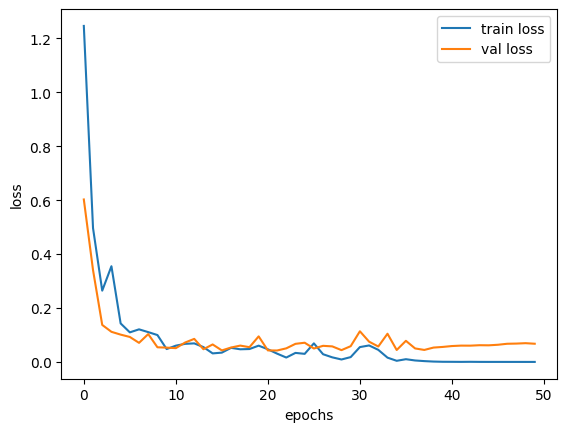

In [35]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

22/22 [==============================] - 0s 17ms/step
[[104   0   0   0   0   0   0]
 [  0 110   0   0   0   0   0]
 [  0   0  88   0   0   0   0]
 [  1   0   0 101   0   0   0]
 [  0   0   0   0 102   0   0]
 [  0   1   0   0   0 100   0]
 [  0   0   0   0   0   0  93]]


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       104
           1       0.99      1.00      1.00       110
           2       1.00      1.00      1.00        88
           3       1.00      0.99      1.00       102
           4       1.00      1.00      1.00       102
           5       1.00      0.99      1.00       101
           6       1.00      1.00      1.00        93

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [38]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test,y_pred)

0.996668803749332

In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9971428571428571


# CNN Conv1D

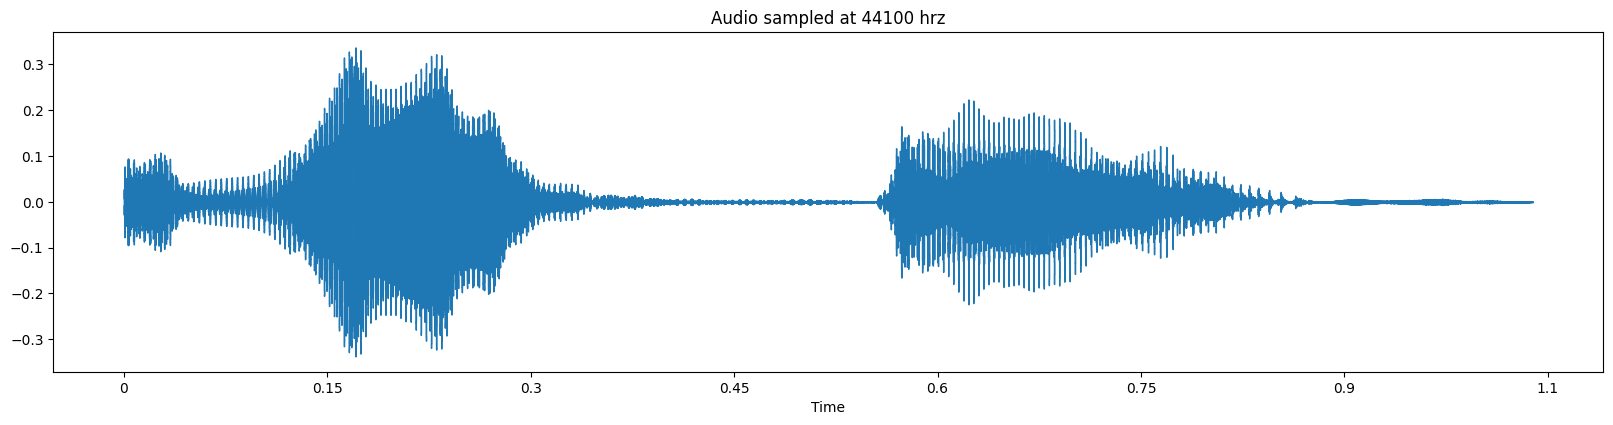

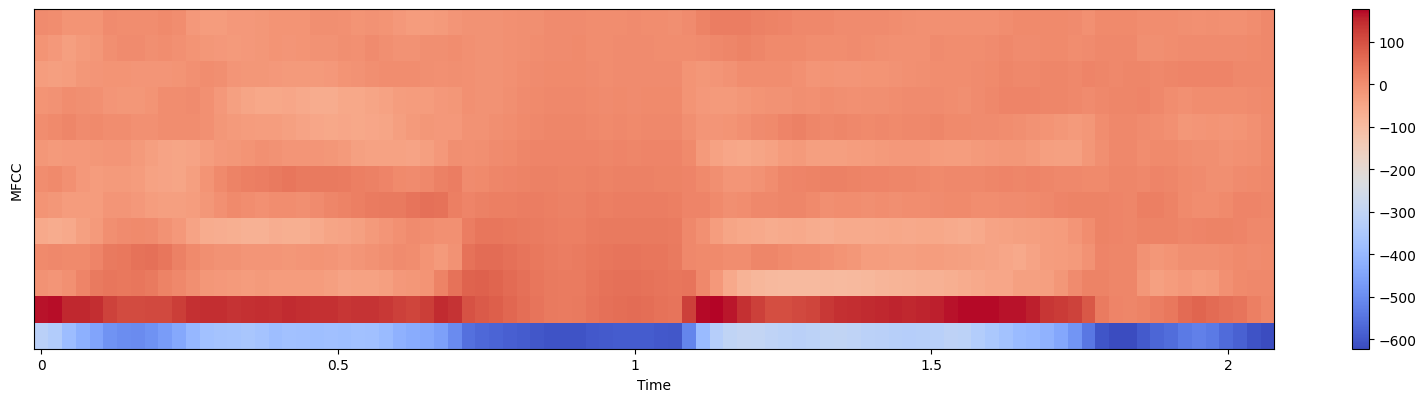

In [40]:
X, sample_rate = librosa.load(paths[0], res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [41]:
df = pd.DataFrame(columns=['feature'])

In [42]:
counter=0
for index,path in enumerate(paths):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
     
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

print(len(df))
df.head()

2800


,feature
0,"[-21.574768, -24.478971, -31.20002, -30.39567,..."
1,"[-21.290598, -23.642208, -34.772285, -34.76848..."
2,"[-21.57829, -25.83936, -34.23591, -33.16338, -..."
3,"[-17.418211, -21.01223, -33.087337, -32.077816..."
4,"[-19.116951, -22.178368, -31.201906, -31.70239..."


In [43]:
df = pd.concat([df2,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

,speech,label,0,1,2,3,4,5,6,7,...,205,206,207,208,209,210,211,212,213,214
0,C:\Users\irems\Audio Emotions Classification\t...,angry,-21.574768,-24.478971,-31.200020,-30.395670,-30.328817,-28.718212,-29.314699,-30.928621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C:\Users\irems\Audio Emotions Classification\t...,angry,-21.290598,-23.642208,-34.772285,-34.768478,-34.227818,-34.456406,-34.343159,-35.636791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C:\Users\irems\Audio Emotions Classification\t...,angry,-21.578291,-25.839359,-34.235909,-33.163380,-32.475628,-33.039963,-33.846123,-33.918644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C:\Users\irems\Audio Emotions Classification\t...,angry,-17.418211,-21.012230,-33.087337,-32.077816,-31.297337,-30.588057,-30.314535,-29.630033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C:\Users\irems\Audio Emotions Classification\t...,angry,-19.116951,-22.178368,-31.201906,-31.702396,-32.518303,-32.055107,-31.863253,-31.363461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df=df.fillna(0)
print(df.shape)
df[:5]

(2800, 217)


,speech,label,0,1,2,3,4,5,6,7,...,205,206,207,208,209,210,211,212,213,214
0,C:\Users\irems\Audio Emotions Classification\t...,angry,-21.574768,-24.478971,-31.200020,-30.395670,-30.328817,-28.718212,-29.314699,-30.928621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C:\Users\irems\Audio Emotions Classification\t...,angry,-21.290598,-23.642208,-34.772285,-34.768478,-34.227818,-34.456406,-34.343159,-35.636791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C:\Users\irems\Audio Emotions Classification\t...,angry,-21.578291,-25.839359,-34.235909,-33.163380,-32.475628,-33.039963,-33.846123,-33.918644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C:\Users\irems\Audio Emotions Classification\t...,angry,-17.418211,-21.012230,-33.087337,-32.077816,-31.297337,-30.588057,-30.314535,-29.630033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C:\Users\irems\Audio Emotions Classification\t...,angry,-19.116951,-22.178368,-31.201906,-31.702396,-32.518303,-32.055107,-31.863253,-31.363461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['speech','label'],axis=1)
                                                    , df.label
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,205,206,207,208,209,210,211,212,213,214
1103,-18.646439,-21.743864,-32.707016,-35.587585,-35.301582,-36.236160,-37.594528,-38.132179,-39.801701,-40.812202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1380,-17.455122,-21.029568,-30.846764,-29.609243,-29.802860,-31.265339,-32.259331,-31.490131,-30.389000,-30.883099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,-27.524021,-28.717804,-31.818729,-33.370422,-34.074837,-32.008766,-30.036716,-28.502897,-28.414564,-27.771538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
839,-19.198627,-22.351957,-26.748106,-26.685843,-27.341251,-27.262001,-26.661711,-26.094553,-26.444651,-29.850716,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2448,-22.466713,-25.491713,-38.002262,-37.892757,-37.010921,-33.775448,-29.881355,-26.161190,-24.620863,-26.226162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2286,-25.334900,-26.558231,-30.926474,-30.030752,-30.305138,-28.887249,-28.527662,-29.169832,-30.266226,-29.635693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1743,-14.891551,-18.170849,-26.506237,-24.922487,-23.733511,-23.748924,-25.733858,-26.692230,-26.670647,-26.811623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
647,-21.588478,-25.198568,-30.031206,-28.793657,-28.773298,-27.688673,-26.390787,-25.712395,-24.792484,-23.356050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2463,-23.001940,-25.553377,-31.752075,-30.331266,-29.749941,-29.523489,-28.316616,-26.772200,-27.398323,-28.474735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1292,-20.726780,-22.861519,-27.625694,-27.915495,-28.490492,-30.275404,-30.629732,-31.704649,-33.302261,-34.375393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
#data normalization 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,205,206,207,208,209,210,211,212,213,214
1103,0.329849,0.186048,-0.873044,-1.797517,-1.761212,-2.045680,-2.433414,-2.549294,-2.948082,-3.173507,...,0.053095,0.053204,0.053383,0.04356,0.043517,0.037724,0.037726,0.037809,0.037805,0.021827
1380,0.677871,0.417790,-0.305466,0.005629,-0.114813,-0.584454,-0.896876,-0.686299,-0.382906,-0.524917,...,0.053095,0.053204,0.053383,0.04356,0.043517,0.037724,0.037726,0.037809,0.037805,0.021827
344,-2.263578,-2.076536,-0.602021,-1.128792,-1.393907,-0.802993,-0.256762,0.151576,0.155173,0.305093,...,0.053095,0.053204,0.053383,0.04356,0.043517,0.037724,0.037726,0.037809,0.037805,0.021827
839,0.168537,-0.011238,0.945066,0.887364,0.622229,0.592369,0.715240,0.827081,0.692020,-0.249528,...,0.053095,0.053204,0.053383,0.04356,0.043517,0.037724,0.037726,0.037809,0.037805,0.021827
2448,-0.786176,-1.029882,-2.488665,-2.492787,-2.273014,-1.322328,-0.212018,0.808390,1.189044,0.717322,...,0.053095,0.053204,0.053383,0.04356,0.043517,0.037724,0.037726,0.037809,0.037805,0.021827
2286,-1.624065,-1.375897,-0.329786,-0.121504,-0.265203,0.114610,0.177846,-0.035489,-0.349447,-0.192171,...,0.053095,0.053204,0.053383,0.04356,0.043517,0.037724,0.037726,0.037809,0.037805,0.021827
1743,1.426772,1.345256,1.018862,1.419215,1.702440,1.625075,0.982462,0.659441,0.630431,0.561150,...,0.053095,0.053204,0.053383,0.04356,0.043517,0.037724,0.037726,0.037809,0.037805,0.021827
647,-0.529615,-0.934776,-0.056633,0.251620,0.193453,0.466944,0.793266,0.934271,1.142273,1.482925,...,0.053095,0.053204,0.053383,0.04356,0.043517,0.037724,0.037726,0.037809,0.037805,0.021827
2463,-0.942533,-1.049888,-0.581684,-0.212143,-0.098968,-0.072419,0.238627,0.637011,0.432122,0.117515,...,0.053095,0.053204,0.053383,0.04356,0.043517,0.037724,0.037726,0.037809,0.037805,0.021827
1292,-0.277886,-0.176557,0.677307,0.516485,0.278129,-0.293453,-0.427551,-0.746468,-1.176836,-1.456487,...,0.053095,0.053204,0.053383,0.04356,0.043517,0.037724,0.037726,0.037809,0.037805,0.021827


In [47]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)

filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(2100, 215)
['angry' 'disgust' 'fear' 'happy' 'neutral' 'ps' 'sad']


In [48]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(2100, 215, 1)

In [49]:
model2 = Sequential()
model2.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))
model2.add(Activation('relu'))
model2.add(Conv1D(256, 8, padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.25))
model2.add(MaxPooling1D(pool_size=(8)))
model2.add(Conv1D(128, 8, padding='same'))
model2.add(Activation('relu'))
model2.add(Conv1D(128, 8, padding='same'))
model2.add(Activation('relu'))
model2.add(Conv1D(128, 8, padding='same'))
model2.add(Activation('relu'))
model2.add(Conv1D(128, 8, padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.25))
model2.add(MaxPooling1D(pool_size=(8)))
model2.add(Conv1D(64, 8, padding='same'))
model2.add(Activation('relu'))
model2.add(Conv1D(64, 8, padding='same'))
model2.add(Activation('relu'))
model2.add(Flatten())
model2.add(Dense(7)) # Target 7 tane
model2.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 215, 256)          2304      
                                                                 
 activation (Activation)     (None, 215, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 215, 256)          524544    
                                                                 
 batch_normalization (BatchN  (None, 215, 256)         1024      
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 215, 256)          0         
                                                                 
 dropout_3 (Dropout)         (None, 215, 256)          0         
                                                      

In [50]:
model2.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model2.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
132/132 [==============================] - 11s 78ms/step - loss: 1.5232 - accuracy: 0.4748 - val_loss: 1.9331 - val_accuracy: 0.3500
Epoch 2/50
132/132 [==============================] - 10s 77ms/step - loss: 1.0740 - accuracy: 0.7510 - val_loss: 1.8827 - val_accuracy: 0.2929
Epoch 3/50
132/132 [==============================] - 10s 78ms/step - loss: 0.8274 - accuracy: 0.8257 - val_loss: 1.6932 - val_accuracy: 0.3943
Epoch 4/50
132/132 [==============================] - 11s 86ms/step - loss: 0.6448 - accuracy: 0.8619 - val_loss: 1.2899 - val_accuracy: 0.7200
Epoch 5/50
132/132 [==============================] - 12s 91ms/step - loss: 0.5226 - accuracy: 0.8800 - val_loss: 0.9355 - val_accuracy: 0.8257
Epoch 6/50
132/132 [==============================] - 12s 90ms/step - loss: 0.4354 - accuracy: 0.8905 - val_loss: 0.7089 - val_accuracy: 0.8929
Epoch 7/50
132/132 [==============================] - 12s 92ms/step - loss: 0.3693 - accuracy: 0.9162 - val_loss: 0.5956 - val_accuracy:

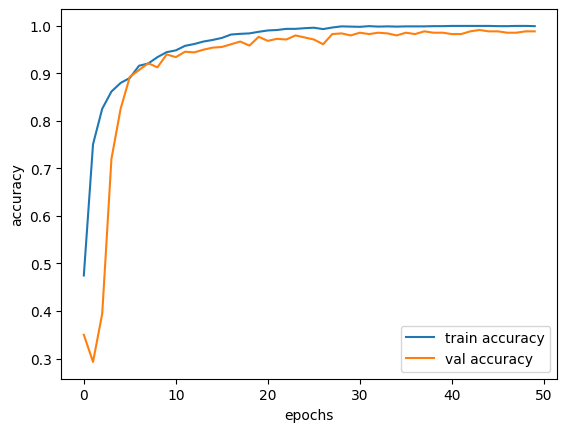

In [51]:
epochs = list(range(50))
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

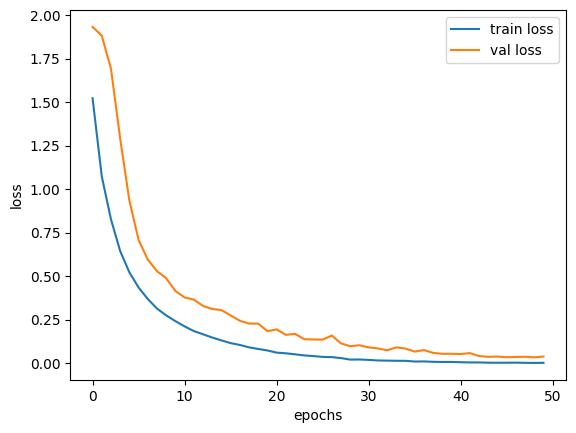

In [52]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import confusion_matrix
y_pred=model2.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

22/22 [==============================] - 1s 29ms/step
[[ 95   0   2   0   0   0   0]
 [  0  99   0   0   0   2   0]
 [  2   0 109   0   0   0   0]
 [  0   0   0  98   0   0   0]
 [  0   0   0   0  91   0   0]
 [  2   0   0   0   0 102   0]
 [  0   0   0   0   0   0  98]]


In [54]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test,y_pred)

0.9866688266347221

In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9885714285714285


RNN: 0.9942857142857143
CNN: 0.9857142857142858

saving the models

In [1]:
import pickle

In [56]:
Filename = 'model'
pickle.dump(model,open(Filename,'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-20 23:27:13         3107
metadata.json                                  2023

In [59]:
Filename2 = 'model2'
pickle.dump(model2,open(Filename2,'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\activation
......vars
...layers\activation_1
......vars
...layers\activation_2
......vars
...layers\activation_3
......vars
...layers\activation_4
......vars
...layers\activation_5
......vars
...layers\activation_6
......vars
...layers\activation_7
......vars
...layers\activation_8
......vars
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\conv1d
......vars
.........0
.........1
...layers\conv1d_1
......vars
.........0
.........1
...layers\conv1d_2
......vars
.........0
.........1
...layers\conv1d_3
......vars
.........0
.........1
...layers\conv1d_4
......vars
.........0
.........1
...layers\conv1d_5
......vars
.........0
.........1
...layers\conv1d_6
......vars
.........0
.........1
...layers\conv1d_7
......vars
.........0
.........1
...layers\dense
......vars
.........0
......